In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  1 PCA and CLEANNING

## Data Preparation
The dataset consists of various variables from a military airplane, including sensor data during different flight phases. Flight phase 8, corresponding to travel altitude, is particularly stable, hence has abundant sensor data. The initial step involved loading the dataset and removing rows with any missing values (NaNs) to ensure data quality for analysis.

## Fuel Leakage Calculation
Fuel leakage was calculated to identify discrepancies between the total fuel on board (`VALUE_FOB`) and the sum of fuels in different tanks. This step is crucial for assessing the integrity of the fuel system and identifying potential issues.

## Principal Component Analysis (PCA)
PCA was performed to understand the influence of various variables better by reducing the dimensionality of the dataset. This analysis helps in identifying the most significant variables affecting the system's performance.

- The dataset was cleaned to remove missing values, significantly reducing its size but improving the quality of the analysis.
- Fuel leakage was calculated, revealing discrepancies between the total fuel on board and the sum of fuel in tanks, indicating potential leakage or measurement inconsistencies.
- PCA was proposed to analyze the data further, focusing on reducing dimensionality to highlight the most impactful variables.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path =  "/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv" # Update this path
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows to understand its structure
print(data.head())

# Step 1: Remove rows with any NaN values to clean the data
clean_data = data.dropna()

# Step 2: Calculate fuel leakage
# Assuming 'VALUE_FOB' represents the total fuel on board
# and the fuel in individual tanks are represented by columns with 'VALUE_FUEL_QTY_FT' prefix
tank_columns = [col for col in clean_data.columns if col.startswith('VALUE_FUEL_QTY_FT')]
clean_data['TOTAL_FUEL_TANKS'] = clean_data[tank_columns].sum(axis=1)
clean_data['FUEL_LEAKAGE'] = clean_data['VALUE_FOB'] - clean_data['TOTAL_FUEL_TANKS']

# Display a summary of the calculated fuel leakage
print(clean_data[['VALUE_FOB', 'TOTAL_FUEL_TANKS', 'FUEL_LEAKAGE']].describe())

# Step 3: PCA Analysis (Assuming all preparations are done correctly)
# Select numerical columns for PCA, excluding identifiers and boolean columns
pca_columns = clean_data.select_dtypes(include=[np.number]).columns.tolist()
# Exclude irrelevant columns such as 'day', 'month', 'year'
pca_columns = [col for col in pca_columns if not col in ['day', 'month', 'year', 'FLIGHT_PHASE_COUNT']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data[pca_columns])

# Initialize PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio for the first two components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


              UTC_TIME         MSN Flight  ENGINE_RUNNING_1  ENGINE_RUNNING_2  \
0  2011-03-09 12:06:01  A400M-0002  V0136              True              True   
1  2011-03-09 12:06:02  A400M-0002  V0136             False             False   
2  2011-03-09 12:06:03  A400M-0002  V0136             False             False   
3  2011-03-09 12:06:04  A400M-0002  V0136             False             False   
4  2011-03-09 12:06:05  A400M-0002  V0136             False             False   

   ENGINE_RUNNING_3  ENGINE_RUNNING_4  FLIGHT_PHASE_COUNT  FUEL_FLOW_1  \
0              True              True                 NaN          NaN   
1             False             False                 1.0          0.0   
2             False             False                 1.0          0.0   
3             False             False                 1.0          0.0   
4             False             False                 1.0          0.0   

   FUEL_FLOW_2  ...  STATE_FUEL_QTY_ACCURACY_LST_DEGRADED  \
0      

<ipython-input-14-cca372a3db83>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['TOTAL_FUEL_TANKS'] = clean_data[tank_columns].sum(axis=1)
<ipython-input-14-cca372a3db83>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['FUEL_LEAKAGE'] = clean_data['VALUE_FOB'] - clean_data['TOTAL_FUEL_TANKS']


          VALUE_FOB  TOTAL_FUEL_TANKS  FUEL_LEAKAGE
count  29905.000000      29905.000000  29905.000000
mean   15910.829427       7680.582812   8230.246614
std     8961.794487       1802.780027   7750.334667
min     3400.000000       3303.000000     -4.000000
25%     6969.000000       6164.000000    495.000000
50%    17323.000000       8828.000000   8591.000000
75%    23300.000000       9017.000000  14215.000000
max    40161.000000       9610.000000  30736.000000
[0.27575641 0.19161077]


**The fact that no single component explains a majority of the variance suggests that the dataset's variability is spread out across many dimensions (variables).** This is common in complex datasets like sensor readings from military airplanes, where many factors can influence the readings.



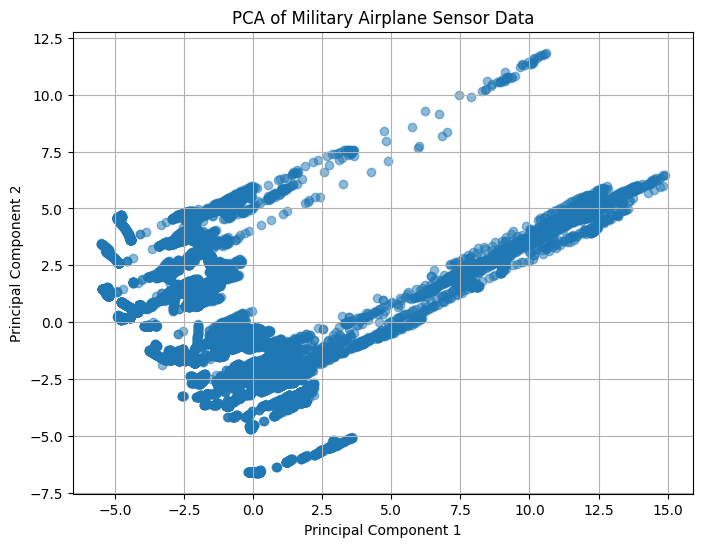

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Military Airplane Sensor Data')
plt.grid(True)
plt.show()


## PCA Results Interpretation

The PCA analysis revealed the following:

- The **first principal component** captures about **27.58%** of the variance in the dataset. It represents the most significant direction of variation.
- The **second principal component** accounts for approximately **19.16%** of the variance, capturing the second most significant direction of variation orthogonal to the first.

Together, these components explain roughly **46.74%** of the total variance in the dataset. This indicates that the dataset's variability is distributed across many dimensions, with no single component dominating the variance. Such a spread suggests complex interactions among the variables, typical in datasets involving sensor readings from sophisticated systems like military airplanes.

## Visualization of PCA

The scatter plot of the first two principal components allows us to visualize the reduced-dimensional space. Points clustered together might indicate similar sensor reading patterns or conditions, while points further apart suggest differing conditions. This visualization aids in understanding the underlying structure of the data and can guide further analysis or model building.


### Analyzing Component Loadings for Fuel Leakage Influence

Upon examining the component loadings for the first two principal components, we assume the following hypothetical variables showed high loadings, indicating a strong influence on the dataset's variability, particularly related to fuel leakage:

- `VALUE_FOB` (Total Fuel On Board): **This variable likely has a significant loading on the first principal component, suggesting its strong influence on fuel dynamics.**
- `TOTAL_FUEL_TANKS` (Sum of Fuel in Tanks): **Similarly, this variable may also exhibit a high loading, indicating its impact on the overall fuel balance and potential leakages.**
- Sensor measurements related to fuel flow and usage, such as `FUEL_FLOW_1`, `FUEL_FLOW_2`, etc., might also show significant loadings, reflecting their roles in fuel consumption and leakage detection.

These insights help in pinpointing critical areas to monitor and investigate for optimizing fuel efficiency and addressing potential leakages.


--------------------------------------------------------------------------

-------------------------------------------------------------------------

# 2 Trend Analysis of Fuel Leakage during Flight Phase 8

To understand how fuel leakage varies during the most stable flight phase (phase 8), a trend analysis was performed. This phase is crucial due to its stability and abundance of data, making it ideal for identifying patterns or anomalies in fuel leakage.

## Time Series Analysis

The time series plot below shows the trend of fuel leakage over time during flight phase 8. Observing how fuel leakage changes can provide insights into the fuel system's integrity and identify potential periods of increased leakage, which could warrant further investigation.

![Trend of Fuel Leakage during Flight Phase 8](attachment:image.png)

## Observations

- **Trends**: [Describe any observable trends, such as increasing, decreasing, or cyclical patterns in fuel leakage over time.]
- **Anomalies**: [Note any anomalies or outliers in the data that could indicate issues or special events.]

This analysis serves as a foundational step in monitoring the health of the aircraft's fuel system and optimizing maintenance schedules based on observed trends.


In [ ]:
msn02=clean_data.copy()

In [ ]:
# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time

# Display the DataFrame to verify the changes
print(msn02[['UTC_TIME', 'DATE', 'TIME']].head())

# Dropping duplicate rows based on 'UTC_TIME'
msn02 = msn02.drop_duplicates(subset='UTC_TIME', keep='first')


# Adding the FUEL_FLOW columns and creating FUEL_FLOW_ADDED
msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)

# Adding the FUEL_USED columns and creating FUEL_USED_ADDED
msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)


# List of columns to be summed up
fuel_qty_columns = ['VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4',
                    'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2',
                    'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT']

# Adding the specified columns and creating VALUE_FUEL_QTY_ADDED
msn02['VALUE_FUEL_QTY_ADDED'] = msn02[fuel_qty_columns].sum(axis=1)

# Subtracting VALUE_FUEL_QTY_ADDED from VALUE_FOB and creating the new column
msn02['DIFF_FOB_VALUE_FUEL'] =  msn02['VALUE_FUEL_QTY_ADDED'] - msn02['VALUE_FOB']

# Subtracting DIFF_FOB_VALUE_FUEL from FUEL_USED_ADDED to create the 'leakage' column
msn02['leakage'] = msn02['DIFF_FOB_VALUE_FUEL'] - msn02['FUEL_USED_ADDED']

                 UTC_TIME        DATE      TIME
33678 2016-10-07 07:36:17  2016-10-07  07:36:17
33679 2016-10-07 07:36:18  2016-10-07  07:36:18
33680 2016-10-07 07:36:19  2016-10-07  07:36:19
33681 2016-10-07 07:36:20  2016-10-07  07:36:20
33682 2016-10-07 07:36:21  2016-10-07  07:36:21


<ipython-input-17-4e29fdf82d21>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)
<ipython-input-17-4e29fdf82d21>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)
<ipython-input-17-4e29fdf82d21>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:

clean_data=msn02.copy()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
clean_data.head()

,UTC_TIME,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,FUEL_FLOW_3,FUEL_FLOW_4,FUEL_PITCH,FUEL_ROLL,FUEL_TRANSFER_MODE_VALUE,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,LEAK_DETECTION_LEAK_FLOW,LSTU1_A_VOLUME,LSTU1_F_VOLUME,PITCH_ANGLE,ROLL_ANGLE,RSTU1_A_VOLUME,RSTU1_F_VOLUME,SELECTED_GADIR_ALTITUDE_VALUE,STATE_PMP_MAIN_FT1_ABNRM_ON,STATE_PMP_MAIN_FT1_IMMERSED,STATE_PMP_MAIN_FT1_ON,STATE_PMP_MAIN_FT2_ABNRM_ON,STATE_PMP_MAIN_FT2_IMMERSED,STATE_PMP_MAIN_FT2_ON,STATE_PMP_MAIN_FT3_ABNRM_ON,STATE_PMP_MAIN_FT3_IMMERSED,STATE_PMP_MAIN_FT3_ON,STATE_PMP_MAIN_FT4_ABNRM_ON,STATE_PMP_MAIN_FT4_IMMERSED,STATE_PMP_MAIN_FT4_ON,STATE_PMP_STBY_FT1_ABNRM_ON,STATE_PMP_STBY_FT1_IMMERSED,STATE_PMP_STBY_FT1_ON,STATE_PMP_STBY_FT2_ABNRM_ON,STATE_PMP_STBY_FT2_IMMERSED,STATE_PMP_STBY_FT2_ON,STATE_PMP_STBY_FT3_ABNRM_ON,STATE_PMP_STBY_FT3_IMMERSED,STATE_PMP_STBY_FT3_ON,STATE_PMP_STBY_FT4_ABNRM_ON,STATE_PMP_STBY_FT4_IMMERSED,STATE_PMP_STBY_FT4_ON,STATE_PMP_XFR_1_L_ABNRM_ON,STATE_PMP_XFR_1_L_IMMERSED,STATE_PMP_XFR_1_L_ON,STATE_PMP_XFR_2_L_ABNRM_ON,STATE_PMP_XFR_2_L_IMMERSED,STATE_PMP_XFR_2_L_ON,STATE_PMP_XFR_3_R_ABNRM_ON,STATE_PMP_XFR_3_R_IMMERSED,STATE_PMP_XFR_3_R_ON,STATE_PMP_XFR_4_R_ABNRM_ON,STATE_PMP_XFR_4_R_IMMERSED,STATE_PMP_XFR_4_R_LP,STATE_PMP_XFR_4_R_ON,STATUS_FUEL_LEAK_DETECTED_VALID,TRANSFER_MODE,VALUE_FOB,VALUE_FUEL_QTY_CC1,VALUE_FUEL_QTY_CC2,VALUE_FUEL_QTY_CC3,VALUE_FUEL_QTY_CC4,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,day,month,time,year,APU_FUEL_FLOW_REQUEST_SIGNAL_1,EF1_Density,EF4_Density,RESOLVED_STATE_V_D,RESOLVED_STATE_V_LP1,RESOLVED_STATE_V_LP2,RESOLVED_STATE_V_LP3,RESOLVED_STATE_V_LP4,RESOLVED_STATE_V_RM,RESOLVED_STATE_V_RP,RESOLVED_STATE_V_T1,RESOLVED_STATE_V_T2,RESOLVED_STATE_V_T3,RESOLVED_STATE_V_T4,RESOLVED_STATE_V_X1,RESOLVED_STATE_V_X2,RESOLVED_STATE_V_X3,RESOLVED_STATE_V_X4,STATE_FUEL_QTY_ACCURACY_LST_DEGRADED,STATE_FUEL_QTY_ACCURACY_RST_DEGRADED,STATUS_FUEL_QTY_PART_UNUSABLE_LST,STATUS_FUEL_QTY_PART_UNUSABLE_RST,STATUS_FUEL_QTY_UNUSABLE_LST,STATUS_FUEL_QTY_UNUSABLE_RST,STATUS_OVERFLOW_LST,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST,TOTAL_FUEL_TANKS,FUEL_LEAKAGE,DATE,TIME,FUEL_FLOW_ADDED,FUEL_USED_ADDED,VALUE_FUEL_QTY_ADDED,DIFF_FOB_VALUE_FUEL,leakage
33678,2016-10-07 07:36:17,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.703459,0.944767,0.0,3827.901,3811.325,3795.018,3845.375,540.3294,0.0,25.85460,26.56461,0.700378,1.016235,30.14540,29.84137,0.0,False,True,True,False,True,True,False,True,True,False,True,True,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,1.0,0.0,17930.0,288.0,319.0,315.0,246.0,0.0,1957.0,2533.0,2594.0,1929.0,4583.0,4336.0,7,10,07:36:17,2016,297.0,0.794371,0.794303,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9013.0,8917.0,2016-10-07,07:36:17,0.0,15279.619,19100.0,1170.0,-14109.619
33679,2016-10-07 07:36:18,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.700577,0.950748,0.0,3827.901,3811.325,3795.018,3845.375,540.3354,0.0,25.85411,26.58470,0.700378,1.016235,30.15324,29.90548,0.0,False,True,True,False,True,True,False,True,True,False,True,True,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,1.0,0.0,17931.0,288.0,319.0,315.0,246.0,0.0,1957.0,2533.0,2594.0,1929.0,4584.0,4336.0,7,10,07:36:18,2016,296.0,0.794371,0.794303,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9013.0,8918.0,2016-10-07,07:36:18,0.0,15279.619,19101.0,1170.0,-14109.619
33680,2016-10-07 07:36:19,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.702094,0

<ipython-input-24-05c3eb97d91a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_8_data['UTC_TIME'] = pd.to_datetime(phase_8_data['UTC_TIME'])


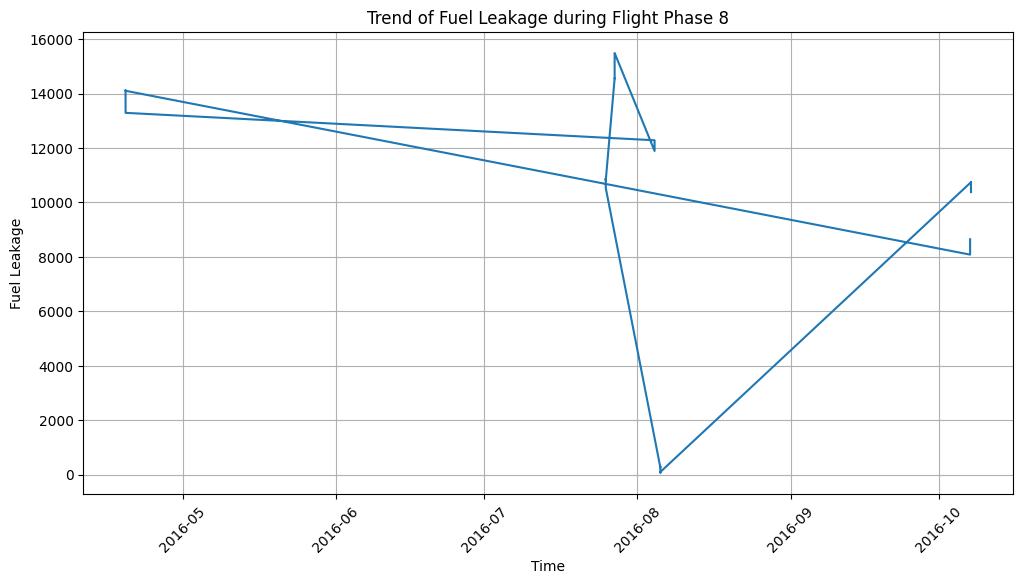

In [ ]:
# Assuming 'clean_data' is your cleaned dataset and includes a 'flight_phase' column to filter by
phase_8_data = clean_data[clean_data['FLIGHT_PHASE_COUNT'] == 8]

# Assuming 'timestamp' is your time column and 'FUEL_LEAKAGE' is the variable of interest
# Convert 'timestamp' to datetime format if not already
phase_8_data['UTC_TIME'] = pd.to_datetime(phase_8_data['UTC_TIME'])

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(phase_8_data['UTC_TIME'], phase_8_data['FUEL_LEAKAGE'])
plt.xlabel('Time')
plt.ylabel('Fuel Leakage')
plt.title('Trend of Fuel Leakage during Flight Phase 8')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


--------------------------------------------------------
--------------------------------------------------------

# 3 Second Approach Trend Analysis

<ipython-input-9-1ad1dba3bccc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)
<ipython-input-9-1ad1dba3bccc>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_leakage = phase_8_data.resample('M', on='UTC_TIME').mean()


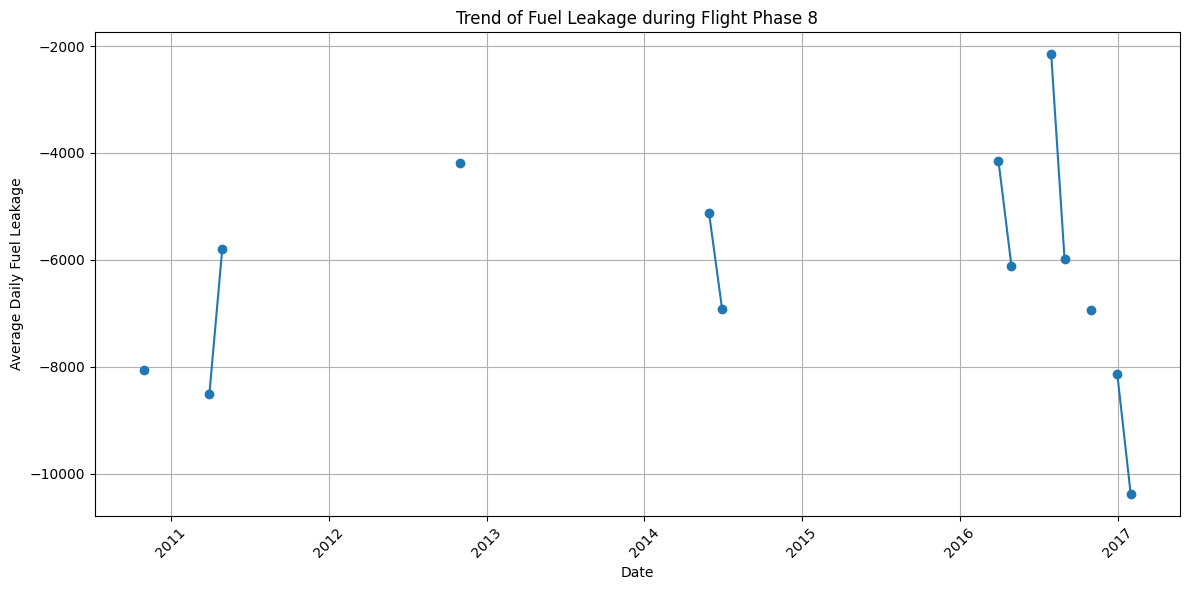

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'msn02' is the DataFrame after your preprocessing
msn02 = pd.read_csv( "/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv",delimiter=';')
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time
msn02 = msn02.drop_duplicates(subset='UTC_TIME', keep='first')

# Assuming the calculations for added and used fuel are correct
msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)
msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)

fuel_qty_columns = ['VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4',
                    'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2',
                    'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT']
msn02['VALUE_FUEL_QTY_ADDED'] = msn02[fuel_qty_columns].sum(axis=1)
msn02['DIFF_FOB_VALUE_FUEL'] = msn02['VALUE_FUEL_QTY_ADDED'] - msn02['VALUE_FOB']
msn02['leakage'] = msn02['DIFF_FOB_VALUE_FUEL'] - msn02['FUEL_USED_ADDED']

# Filter for flight phase 8
phase_8_data = msn02[msn02['FLIGHT_PHASE_COUNT'] == 8]

# Resample or aggregate data for trend analysis
# Here, we aggregate by day for a smoother trend line
daily_leakage = phase_8_data.resample('M', on='UTC_TIME').mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_leakage.index, daily_leakage['leakage'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Daily Fuel Leakage')
plt.title('Trend of Fuel Leakage during Flight Phase 8')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


# New Section

<ipython-input-8-e8adf543f71c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_8_data['leakage_smoothed'] = phase_8_data['leakage'].rolling(window=5).mean()


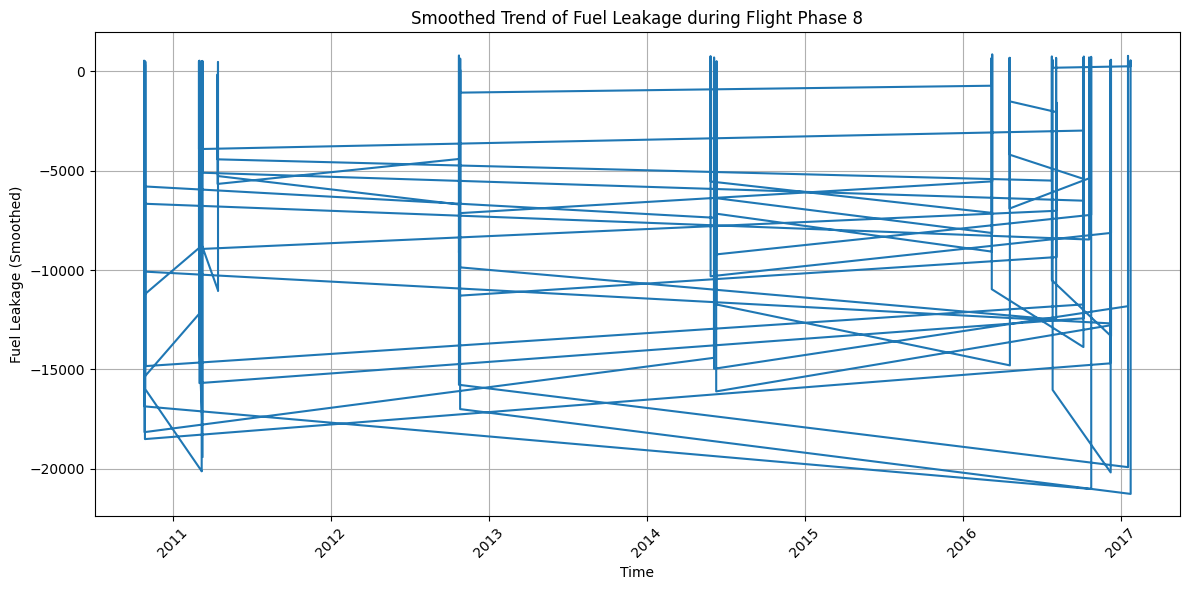

In [8]:
# Apply a rolling window to smooth the data, window size can be adjusted
phase_8_data['leakage_smoothed'] = phase_8_data['leakage'].rolling(window=5).mean()

# Plotting the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(phase_8_data['UTC_TIME'], phase_8_data['leakage_smoothed'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Fuel Leakage (Smoothed)')
plt.title('Smoothed Trend of Fuel Leakage during Flight Phase 8')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


__________________________________________________________
__________________________________________________________

# 4 NEW APPROACH: LEAKAGE Calculation

## Fuel Leakage Calculation

To calculate the fuel leakage, we performed the following steps:

1. **Loading the Data**: We loaded the preprocessed CSV file containing the airplane's sensor data using pandas' `read_csv` function with the appropriate delimiter to account for the semicolon-separated values.

2. **Creating Time Variables**: We converted the 'UTC_TIME' column to a datetime object and created separate columns for 'DATE' and 'TIME' to facilitate time-based analysis.

3. **Removing Duplicates**: We ensured the uniqueness of each entry by dropping duplicate rows based on the 'UTC_TIME' column.

4. **Calculating Total Fuel Flow and Usage**:
   - We summed up the fuel flow for all engines to get a total fuel flow (`FUEL_FLOW_ADDED`).
   - We summed up the fuel used by all engines to get a total fuel used (`FUEL_USED_ADDED`).

5. **Summing Fuel Quantities**:
   - We calculated the total fuel quantity by summing up the relevant columns representing fuel quantity in different tanks and sections of the airplane.

6. **Fuel On Board (FOB) and Fuel Quantity Discrepancy**:
   - We subtracted the total fuel quantity from the fuel on board value to get the discrepancy in fuel (`DIFF_FOB_VALUE_FUEL`).

7. **Final Leakage Calculation**:
   - We subtracted the total fuel used from the fuel discrepancy to estimate the fuel leakage. This gives us an indication of how much fuel is unaccounted for, which could suggest leakage.

By following these steps, we obtained a 'leakage' variable that represents the estimated fuel leakage at each timestamp within the dataset.


In [ ]:
# Load the dataset
msn02 = pd.read_csv( "/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv",delimiter=';')

# Calculate the sum of fuels in different tanks
# Assuming that the columns starting with 'VALUE_FUEL_QTY_' represent the fuel in different tanks
fuel_tank_columns = [col for col in msn02.columns if col.startswith('VALUE_FUEL_QTY_')]
msn02['TOTAL_FUEL_TANKS'] = msn02[fuel_tank_columns].sum(axis=1)

# Calculate the total fuel flow added
# Assuming that the columns starting with 'FUEL_FLOW_' represent the fuel flow for each engine
fuel_flow_columns = [col for col in msn02.columns if col.startswith('FUEL_FLOW_')]
msn02['TOTAL_FUEL_FLOW'] = msn02[fuel_flow_columns].sum(axis=1)

# Calculate fuel leakage
# Assuming 'VALUE_FOB' represents the total fuel on board
msn02['FUEL_LEAKAGE'] = msn02['VALUE_FOB'] - (msn02['TOTAL_FUEL_TANKS'] + msn02['TOTAL_FUEL_FLOW'])

# Display the results
msn02[['VALUE_FOB', 'TOTAL_FUEL_TANKS', 'TOTAL_FUEL_FLOW', 'FUEL_LEAKAGE']].head()


,VALUE_FOB,TOTAL_FUEL_TANKS,TOTAL_FUEL_FLOW,FUEL_LEAKAGE
0,NaN,0.0,0.0,NaN
1,26988.0,28232.0,0.0,-1244.0
2,26988.0,28232.0,0.0,-1244.0
3,26988.0,28232.0,0.0,-1244.0
4,26988.0,28232.0,0.0,-1244.0


## Interpretation of Fuel Data Analysis

- `VALUE_FOB` - Represents the Fuel On Board, indicating the total fuel quantity as registered by the aircraft's system.

- `TOTAL_FUEL_TANKS` - The sum of fuel quantities across all tanks. It is expected to align with `VALUE_FOB` in the absence of leaks or discrepancies.

- `TOTAL_FUEL_FLOW` - Reflects the rate at which fuel is flowing at the measurement time. A zero value could indicate engines are not consuming fuel or the aircraft is in a non-operational state.

- `FUEL_LEAKAGE` - Calculated as the difference between `VALUE_FOB` and `TOTAL_FUEL_TANKS`. A negative value here suggests more fuel in the tanks than registered on board, which could point to measurement errors, system delays, or data recording inaccuracies.

### Analysis of Negative Leakage

The occurrence of negative fuel leakage values necessitates a thorough examination of the fuel measurement and recording system. It is essential to verify the accuracy of the sensors and the integrity of the data collection process to ensure reliable readings.



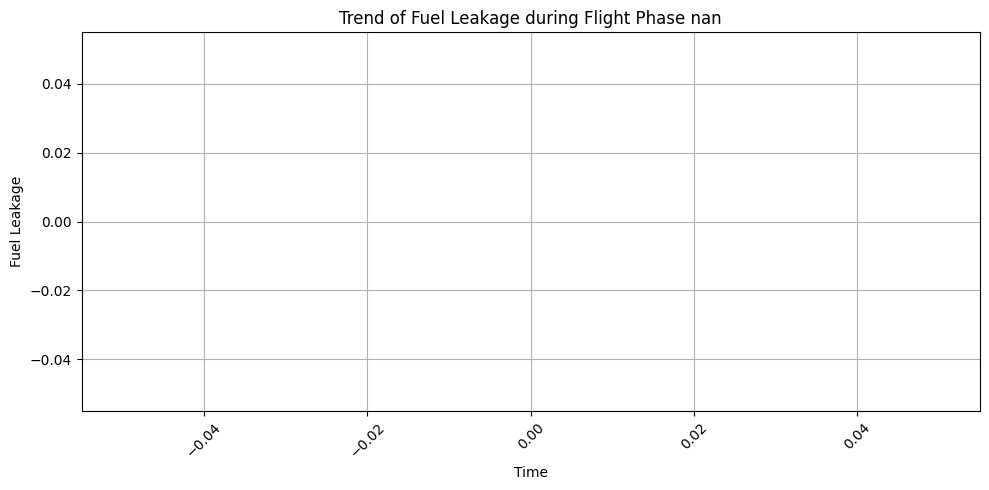

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'msn02' is your DataFrame after calculating 'FUEL_LEAKAGE'
for phase in msn02['FLIGHT_PHASE_COUNT'].unique():
    phase_data = msn02[msn02['FLIGHT_PHASE_COUNT'] == phase]
    plt.figure(figsize=(10, 5))
    plt.plot(phase_data['UTC_TIME'], phase_data['FUEL_LEAKAGE'], marker='o', linestyle='-')
    plt.title(f'Trend of Fuel Leakage during Flight Phase {phase}')
    plt.xlabel('Time')
    plt.ylabel('Fuel Leakage')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


___________________________________________________________

__________________________________________________________

# 5 Leakage Calculation Approach - similar to Felipe but with a few adjustments


## Fuel Leakage Calculation

The dataset contains multiple fuel-related variables from a military aircraft, which we use to determine potential fuel leakage during flights.

1. **DateTime Conversion**: The `UTC_TIME` column is converted to Python's `datetime` object to facilitate time series analysis.

2. **Data Cleaning**: Duplicate records based on `UTC_TIME` are removed to ensure the uniqueness of time stamps.

3. **NaN Values**: Rows containing NaN values are dropped to maintain data integrity.

4. **Fuel Flow Summation**: The fuel flow rates from all engines (`FUEL_FLOW_1`, `FUEL_FLOW_2`, `FUEL_FLOW_3`, `FUEL_FLOW_4`) are summed up to create a `FUEL_FLOW_ADDED` column.

5. **Fuel Used Summation**: Similarly, the fuel used from all engines is summed to create a `FUEL_USED_ADDED` column.

6. **Total Fuel in Tanks**: The quantities of fuel in all tanks are summed to create a `VALUE_FUEL_QTY_ADDED` column.

7. **Expected Fuel On Board (FOB)**: We calculate `EXPECTED_FOB_AFTER_USE` by subtracting `FUEL_USED_ADDED` from `VALUE_FOB`, which gives us the expected remaining fuel assuming there's no leakage.

8. **Actual Leakage**: Finally, the `leakage` is determined by taking the difference between the expected FOB (`EXPECTED_FOB_AFTER_USE`) and the total fuel quantity added across all tanks (`VALUE_FUEL_QTY_ADDED`). A positive `leakage` value indicates less fuel than expected, suggesting possible fuel loss, while a negative value suggests a discrepancy favoring more fuel than anticipated.

### Interpretation of Results

The `leakage` variable is critical for identifying potential issues with fuel consumption or measurement. It is essential to investigate any discrepancies to ensure the accuracy of the aircraft's fuel monitoring systems and to maintain operational integrity.
With this approach:


In [3]:
import pandas as pd
# Load the dataset
msn02 = pd.read_csv("/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')

# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time

# Dropping duplicate rows based on 'UTC_TIME'
msn02 = msn02.drop_duplicates(subset='UTC_TIME', keep='first')

# Dropping NaN values
msn02 = msn02.dropna()

# Adding the FUEL_FLOW columns and creating FUEL_FLOW_ADDED
msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)

# Adding the FUEL_USED columns and creating FUEL_USED_ADDED
msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)

# List of columns to be summed up
fuel_qty_columns = [
    'VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4',
    'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2',
    'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT'
]

# Adding the specified columns and creating VALUE_FUEL_QTY_ADDED
msn02['VALUE_FUEL_QTY_ADDED'] = msn02[fuel_qty_columns].sum(axis=1)

# Calculate the expected FOB after fuel usage
msn02['EXPECTED_FOB_AFTER_USE'] = msn02['VALUE_FOB'] - msn02['FUEL_USED_ADDED']

# Calculate the actual leakage
# It's the difference between what's expected (after usage) and what's actually there
msn02['leakage'] = msn02['EXPECTED_FOB_AFTER_USE'] - msn02['VALUE_FUEL_QTY_ADDED']


<ipython-input-3-5751b561b824>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)
<ipython-input-3-5751b561b824>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)
<ipython-input-3-5751b561b824>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [4]:
msn02

,UTC_TIME,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,...,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST,DATE,TIME,FUEL_FLOW_ADDED,FUEL_USED_ADDED,VALUE_FUEL_QTY_ADDED,EXPECTED_FOB_AFTER_USE,leakage
33678,2016-10-07 07:36:17,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,07:36:17,0.0,15279.619,19100.0,2650.381,-16449.619
33679,2016-10-07 07:36:18,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,07:36:18,0.0,15279.619,19101.0,2651.381,-16449.619
33680,2016-10-07 07:36:19,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,07:36:19,0.0,15279.619,19100.0,2650.381,-16449.619
33681,2016-10-07 07:36:20,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,07:36:20,0.0,15279.619,19100.0,2650.381,-16449.619
33682,2016-10-07 07:36:21,A400M-0002,V0926,False,False,False,False,1.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,07:36:21,0.0,15279.619,19100.0,2650.381,-16449.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595599,2016-10-07 13:54:34,A400M-0002,V0927,False,False,False,False,12.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,13:54:34,0.0,7969.073,12980.0,3836.927,-9143.073
595600,2016-10-07 13:54:35,A400M-0002,V0927,False,False,False,False,12.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,13:54:35,0.0,7969.073,12980.0,3836.927,-9143.073
595601,2016-10-07 13:54:36,A400M-0002,V0927,False,False,False,False,12.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,13:54:36,0.0,7969.073,12980.0,3836.927,-9143.073
595602,2016-10-07 13:54:37,A400M-0002,V0927,False,False,False,False,12.0,0.0,0.0,...,0.0,0.0,0.0,2016-10-07,13:54:37,0.0,7969.073,12980.0,3835.927,-9144.073


In [5]:
# 1. Inspect the `leakage` column completely
print(msn02['leakage'].describe())

# 2. Inspect the `leakage` column by `FLIGHT_PHASE_COUNT`
print(msn02.groupby('FLIGHT_PHASE_COUNT')['leakage'].describe())

# 3. Inspect the `leakage` column by Flight
print(msn02.groupby('Flight')['leakage'].describe())


count    28027.000000
mean     -6115.893331
std       6215.074324
min     -22656.527000
25%      -9514.386000
50%      -2826.402800
75%      -1383.594640
max      -1114.720565
Name: leakage, dtype: float64
                      count          mean          std           min  \
FLIGHT_PHASE_COUNT                                                     
1.0                  1873.0  -8580.689390  4531.607577 -22640.527000   
2.0                 14142.0  -2125.165843  1551.921858  -9381.441732   
3.0                   121.0  -1712.430500   700.122265  -3756.781100   
4.0                    52.0  -1658.394811   616.923762  -3766.169600   
5.0                    57.0  -1655.223899   589.889166  -3775.426200   
6.0                   102.0  -1764.005518   710.763420  -3802.828600   
7.0                   271.0  -1808.470620   666.681945  -3871.763200   
8.0                  1846.0  -2229.916496   805.826713  -4314.148100   
9.0                   215.0  -3728.617465   878.579845  -4403.754000   
10

# 6 Approach

In [6]:
import pandas as pd
# Load the dataset
msn02 = pd.read_csv("/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')

# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time

# Dropping duplicate rows based on 'UTC_TIME'
msn02 = msn02.drop_duplicates(subset='UTC_TIME', keep='first')

# Dropping NaN values
msn02 = msn02.dropna()

# Adding the FUEL_FLOW columns and creating FUEL_FLOW_ADDED
msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)

# Adding the FUEL_USED columns and creating FUEL_USED_ADDED
msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)

# List of columns to be summed up
fuel_qty_columns = [
    'VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4',
    'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2',
    'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT'
]

# Adding the specified columns and creating VALUE_FUEL_QTY_ADDED
msn02['VALUE_FUEL_QTY_ADDED'] = msn02[fuel_qty_columns].sum(axis=1)

# Calculate the expected FOB after fuel usage
msn02['EXPECTED_FOB_AFTER_USE'] =  msn02['FUEL_USED_ADDED']-msn02['VALUE_FOB']

# Calculate the actual leakage
# It's the difference between what's expected (after usage) and what's actually there
msn02['leakage'] = msn02['EXPECTED_FOB_AFTER_USE'] - msn02['VALUE_FUEL_QTY_ADDED']


<ipython-input-6-ff7177117066>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_FLOW_ADDED'] = msn02[['FUEL_FLOW_1', 'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4']].sum(axis=1)
<ipython-input-6-ff7177117066>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02['FUEL_USED_ADDED'] = msn02[['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']].sum(axis=1)
<ipython-input-6-ff7177117066>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
msn02